In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl

In [2]:
data = pl.read_csv('./dataset/3.Employee_rentation/Employee_Rentation.csv', schema_overrides={"employee_id": pl.Float64})

In [3]:
data

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
i64,f64,i64,str,i64,f64,str,str
1,13021.0,7,"""customer_service""",28,89000.0,"""2014-03-24""","""2015-10-30"""
2,825355.0,7,"""marketing""",20,183000.0,"""2013-04-29""","""2014-04-04"""
3,927315.0,4,"""marketing""",14,101000.0,"""2014-10-13""","""NA"""
4,662910.0,7,"""customer_service""",20,115000.0,"""2012-05-14""","""2013-06-07"""
5,256971.0,2,"""data_science""",23,276000.0,"""2011-10-17""","""2014-08-22"""
…,…,…,…,…,…,…,…
24698,549847.0,3,"""customer_service""",16,97000.0,"""2015-02-18""","""NA"""
24699,590087.0,4,"""engineer""",10,160000.0,"""2015-10-26""","""NA"""
24700,777612.0,4,"""customer_service""",11,67000.0,"""2013-09-03""","""2015-10-23"""


In [4]:
# convert employee_id to int
data = data.with_columns(pl.col("employee_id").cast(pl.Int64))

In [9]:
data = data.with_columns(
    pl.col('quit_date').replace('NA', '2015-12-15')
)

In [11]:
data = data.with_columns(
  pl.when(pl.col('quit_date') == '2015-12-15').then(0).otherwise(1).alias('churn')
)

In [18]:
data = data.with_columns(
    pl.col('join_date').str.to_date(),
    pl.col('quit_date').str.to_date()
)

In [21]:
data = data.with_columns(
    (pl.col('quit_date') - pl.col('join_date')).dt.total_days().alias('working_days')
)

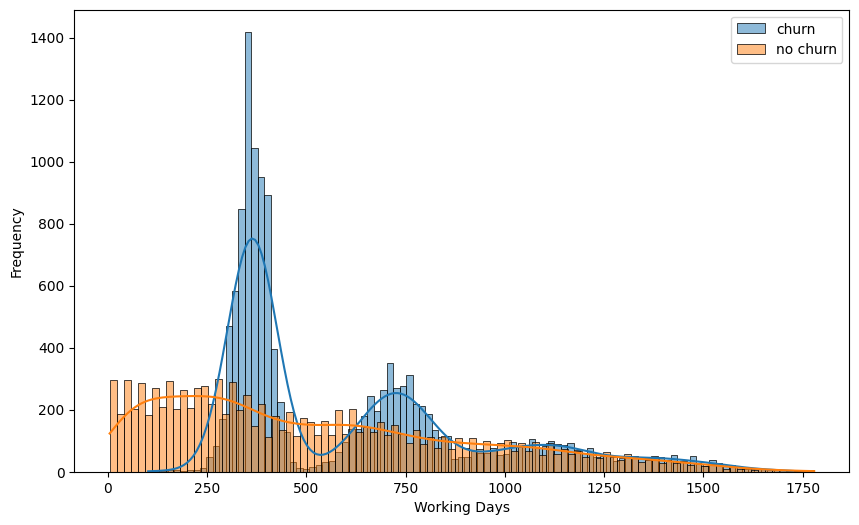

In [27]:
plt.figure(figsize=(10, 6))

data_churn = data.filter(pl.col('churn') == 1)
data_no_churn = data.filter(pl.col('churn') == 0)

sns.histplot(data_churn['working_days'], bins=100, kde=True, label='churn')
sns.histplot(data_no_churn['working_days'], bins=100, kde=True, label='no churn')
plt.xlabel('Working Days')
plt.ylabel('Frequency')
plt.legend()
plt.show()

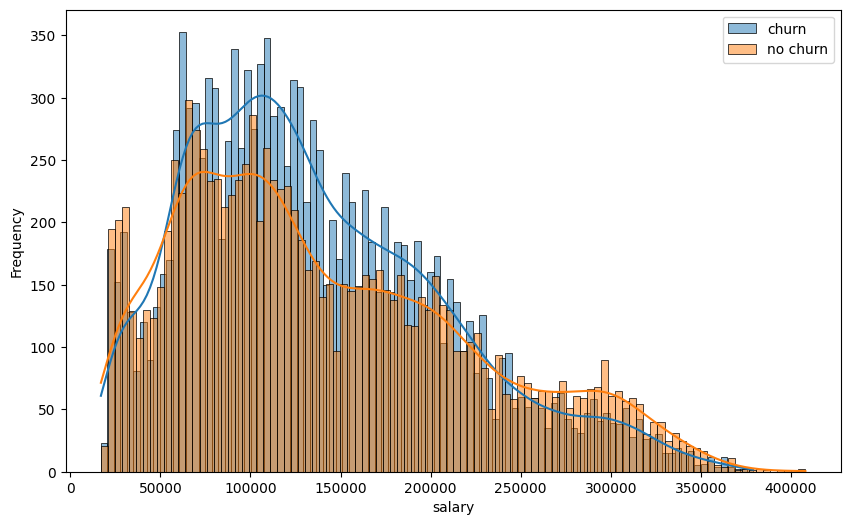

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(data_churn['salary'], bins=100, kde=True, label='churn')
sns.histplot(data_no_churn['salary'], bins=100, kde=True, label='no churn')
plt.xlabel('salary')
plt.ylabel('Frequency')
plt.legend()
plt.show()

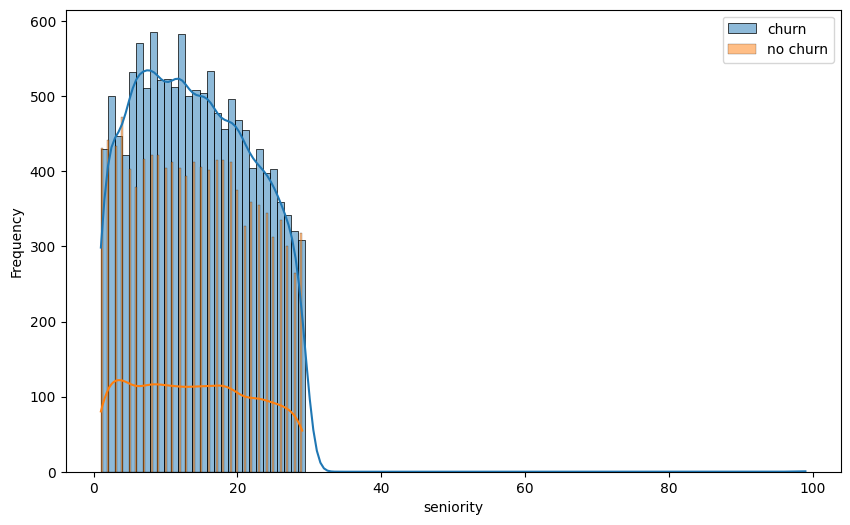

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(data_churn['seniority'], bins=100, kde=True, label='churn')
sns.histplot(data_no_churn['seniority'], bins=100, kde=True, label='no churn')
plt.xlabel('seniority')
plt.ylabel('Frequency')
plt.legend()
plt.show()